# 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### a)

In [2]:
# read in from site and find a unique table containing as indicated by match =
# len(bef_stat) returns 1 confirming only 1 table exists
# decimal = "," indicates that 25,7 is a float and thousands = " " indikerar att 5 000 000 är 5000000
# om bara indikerar decimal = "," blir det fel eftersom thousands = "," är default vilket ger "," för både decimal och thousands

bef_1900_2021 = pd.read_html(
    "https://sv.wikipedia.org/wiki/Sveriges_demografi",
    match="Naturlig befolkningsförändring",
    decimal=",",
    thousands=" ",
)

len(bef_1900_2021)


1

In [3]:
#pringing table as it is - a list
bef_1900_2021

[     Unnamed: 0  Medel- folkmängd   Födda   Döda  \
 0          1900         5117000.0  138139  86146   
 1          1901         5156000.0  139370  82772   
 2          1902         5187000.0  137364  79722   
 3          1903         5210000.0  133896  78610   
 4          1904         5241000.0  134952  80152   
 ..          ...               ...     ...    ...   
 117        2017        10057697.5  115416  91972   
 118        2018        10175213.5  115832  92185   
 119        2019        10278887.0  114523  88766   
 120        2020        10353442.0  113077  98124   
 121        2021        10415810.5  114263  91958   
 
      Naturlig befolkningsförändring  Nativitet (per 1000)  Dödstal (per 1000)  \
 0                             51993                  27.0                16.8   
 1                             56598                  27.0                16.1   
 2                             57642                  26.5                15.4   
 3                             552

In [5]:
df_bef_1900_2021 = bef_1900_2021[0]
#[0] match returnerar en lista med 1 DataFrame, så för att få ut den tabeln som DataFrame indikeras första indexet [0] från listan 

df_bef_1900_2021.head()

,Unnamed: 0,Medel- folkmängd,Födda,Döda,Naturlig befolkningsförändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändring (per 1000),Total fertilitet
0,1900,5117000.0,138139,86146,51993,27.0,16.8,10.2,4.02
1,1901,5156000.0,139370,82772,56598,27.0,16.1,11.0,4.04
2,1902,5187000.0,137364,79722,57642,26.5,15.4,11.1,3.95
3,1903,5210000.0,133896,78610,55286,25.7,15.1,10.6,3.82
4,1904,5241000.0,134952,80152,54800,25.7,15.3,10.5,3.83


In [6]:
df_bef_1900_2021.info()
# numeriska värden i alla kolumner

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 122 non-null    int64  
 1   Medel- folkmängd                           122 non-null    float64
 2   Födda                                      122 non-null    int64  
 3   Döda                                       122 non-null    int64  
 4   Naturlig befolkningsförändring             122 non-null    int64  
 5   Nativitet (per 1000)                       122 non-null    float64
 6   Dödstal (per 1000)                         122 non-null    float64
 7   Naturlig befolkningsförändring (per 1000)  122 non-null    float64
 8   Total fertilitet                           121 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 8.7 KB


# b)

In [7]:
df_bef_1900_2021.rename(columns={"Unnamed: 0": "År"}, inplace=True)
df_bef_1900_2021.head()

,År,Medel- folkmängd,Födda,Döda,Naturlig befolkningsförändring,Nativitet (per 1000),Dödstal (per 1000),Naturlig befolkningsförändring (per 1000),Total fertilitet
0,1900,5117000.0,138139,86146,51993,27.0,16.8,10.2,4.02
1,1901,5156000.0,139370,82772,56598,27.0,16.1,11.0,4.04
2,1902,5187000.0,137364,79722,57642,26.5,15.4,11.1,3.95
3,1903,5210000.0,133896,78610,55286,25.7,15.1,10.6,3.82
4,1904,5241000.0,134952,80152,54800,25.7,15.3,10.5,3.83


<AxesSubplot: xlabel='År', ylabel='Medel- folkmängd'>

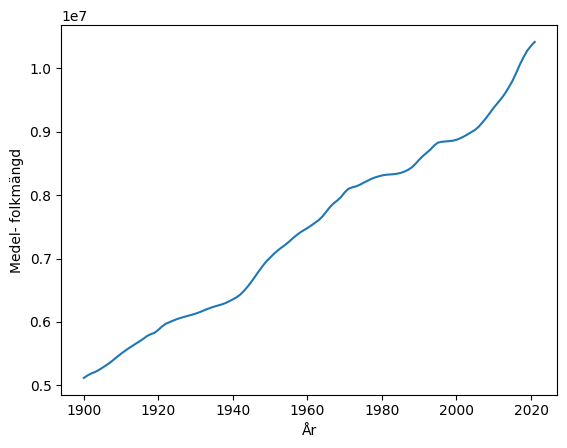

In [50]:
sns.lineplot(data=df_bef_1900_2021, x="År", y="Medel- folkmängd")

In [ ]:
# b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

# c)

In [49]:
df_bef_1570_1865 = pd.read_html(
    "https://sv.wikipedia.org/wiki/Sveriges_demografi",
    match="Vid utgången av år",
    decimal=",",
    thousands="\xa0", #Pandas översätter till unicode så därför \xa0 vilket är översättning på &nbsp; som fanns på hemsidan
    header=[1]
)[0]

df_bef_1570_1865.drop(df_bef_1570_1865.tail(4).index, inplace=True)
df_bef_1570_1865.drop(columns=df_bef_1570_1865.columns[-2:], inplace=True)
df_bef_1570_1865.rename(columns={"Vid utgången av år": "År"}, inplace=True)
df_bef_1570_1865 = df_bef_1570_1865.astype(int)
df_bef_1570_1865.info()


# För Folkmängd funkar ej att ange thousands = " ", då html filen har 900 000 som 900&nbsp;000
# thousands = "&nbsp;" funkar ej då Pandas översätter till unicode så därför \xa0 vilket är översättning på &nbsp; som fanns på hemsidan

#??????????? varför blir årtalet object och inte int?????????????? Görs manuellt om till int mha astype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   År         7 non-null      int32
 1   Folkmängd  7 non-null      int32
dtypes: int32(2)
memory usage: 184.0 bytes
